# Applying ML Regression Algorithm: Prices

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('..')

## Loading data

In [2]:
root = '../data/cars_reg.csv'

df = pd.read_csv(root)
df.head()

,doors,co2_emiss,height,length,max_speed,mixed_cons,weight,tank_vol,acc,price,...,Offroad,Pickup,Roadster,Sedan,Stationwagon,Targa,Van,brand_encoded,model_encoded,city_encoded
0,2,99,157,270,145,4.3,780,33,13.7,5500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11039.980916,10171.125628,15841.032810
1,3,179,140,426,235,7.6,1373,55,7.2,10900,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17051.258362,13160.993789,18049.881613
2,4,109,142,453,222,4.2,1545,42,8.5,36100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23572.093803,23508.383973,18554.493671
3,5,142,162,467,212,5.4,1740,67,8.0,28000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23572.093803,36412.589552,16569.441935
4,2,488,123,446,189,21.0,1546,70,3.9,27990,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12506.369048,17773.464491,17306.168324


## Separating the data into features (X) and target (y) variables

In [3]:
# Train-Test Split
from sklearn.model_selection import train_test_split

In [4]:
# Removing some outliers
features = df.drop('price', axis=1)
target = df['price']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## Applying Regression Models
The objective is to obtain the best posible model by evaluating the performance of 7 models

In [6]:
# Regression linear models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Tree model
from sklearn.ensemble import RandomForestRegressor

# Support Vector Machine model
from sklearn.svm import SVR

# Gradient Boosting models
import xgboost as xgb
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Model Evaluators
from modules.model_evaluator import eval_reg
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, explained_variance_score as evs

Importing `scikit-learn` main functions for training the model.

Gradient Boost Algorithms were explored and understood following [this Medium Article](https://towardsdatascience.com/lightgbm-vs-xgboost-which-algorithm-win-the-race-1ff7dd4917d)

### Linear Regression

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

predictions = lr.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.6804

RMSE = 7347.8798

MSE = 53991337.9755

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 4915.9177

EVS = 68.0534%



### Ridge Regression

In [8]:
rd = Ridge()
rd.fit(X_train, y_train)

predictions = rd.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.6805

RMSE = 7347.3791

MSE = 53983979.4535

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 4915.7982

EVS = 68.0576%



### Random Forest Regressor

In [9]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

predictions = rf.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.8833

RMSE = 4440.7900

MSE = 19720616.0502

MSLE = 0.0724

MAE = 2610.4944

EVS = 88.3293%



### Support Vector Regression

In [10]:
svr = SVR()
svr.fit(X_train, y_train)

predictions = svr.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.1427

RMSE = 12035.1997

MSE = 144846030.8822

MSLE = 0.4510

MAE = 7743.9395

EVS = 18.2469%



### XGBoost Regressor

In [11]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

predictions = xgb_model.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.8736

RMSE = 4621.8174

MSE = 21361196.4862

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 2957.5602

EVS = 87.3577%



### Light Gradient Boosting Machine (LGBM) Regressor

In [12]:
lgb_model = LGBMRegressor()
lgb_model.fit(X_train, y_train)

predictions = lgb_model.predict(X_test)

eval_reg(y_test, predictions)

### MEASURES OF REGRESSION MODEL ###
------------------------------------

R2 = 0.8524

RMSE = 4994.6053

MSE = 24946082.0588

MSLE not possible to be applied. Predicitons contain negative values.

MAE = 3303.4865

EVS = 85.2395%



### CatBoost Regressor

In [13]:
cb_model = CatBoostRegressor()
cb_model.fit(X_train, y_train)

predictions = cb_model.predict(X_test)

eval_reg(y_test, predictions)

Learning rate set to 0.076638
0:	learn: 12271.3939152	total: 58.9ms	remaining: 58.9s
1:	learn: 11749.6345402	total: 76.6ms	remaining: 38.2s
2:	learn: 11289.0352848	total: 83.6ms	remaining: 27.8s
3:	learn: 10880.6201291	total: 89.6ms	remaining: 22.3s
4:	learn: 10505.6946076	total: 96.8ms	remaining: 19.3s
5:	learn: 10164.1577293	total: 107ms	remaining: 17.7s
6:	learn: 9858.2470941	total: 113ms	remaining: 16.1s
7:	learn: 9580.2059931	total: 120ms	remaining: 14.9s
8:	learn: 9324.4549009	total: 126ms	remaining: 13.9s
9:	learn: 9097.4161913	total: 133ms	remaining: 13.2s
10:	learn: 8875.6503815	total: 140ms	remaining: 12.6s
11:	learn: 8693.4462687	total: 146ms	remaining: 12s
12:	learn: 8524.6435461	total: 153ms	remaining: 11.6s
13:	learn: 8364.9529898	total: 160ms	remaining: 11.2s
14:	learn: 8220.5580195	total: 166ms	remaining: 10.9s
15:	learn: 8075.5666113	total: 173ms	remaining: 10.6s
16:	learn: 7963.2191426	total: 180ms	remaining: 10.4s
17:	learn: 7848.6702484	total: 186ms	remaining: 10.1s

---

## Visualizing predictions from model

In [16]:
import matplotlib.pyplot as plt

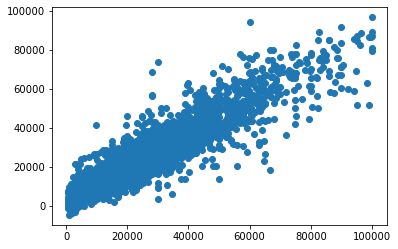

In [23]:
plt.scatter(y_test, predictions);

## Comparing ML Regression Algorithms 

Based on [Jason Brownlee's article](https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/).

---

## Deep Learning. Trying a Neural Network model: Multi-Layer Perceptron (MLP)

---

## Applying a MinMaxScaler to standardize the dataset

Let's see if data standardization improves the performance of the selected model. 